# 6.2 Exploring relationships

# Index
1. Importing libraries and data
2. Correlations
3. Scatter Plots
4. Categorical Plots

# 1. Importing Libraries and Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
# Path to data folder
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 6\Data'

In [4]:
# Import data
gv = pd.read_csv(os.path.join(path, 'prepared data', 'Gun Violence Clean.csv'))

In [5]:
gv.head()

,Unnamed: 0,incident_id,date,state,city_or_county,number_killed,number_injured,latitude,longitude
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559
1,1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330
2,2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377
3,3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569


#
Question 2
I will be leaving out the incident Id column from my analysis, all other variables will be used for the exploratory visual analysis

# 2. Correlations

In [6]:
gv.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'number_killed', 'number_injured', 'latitude', 'longitude'],
      dtype='object')

In [7]:
# Subset with only columns needed for analysis
gv_sub = gv[['number_killed', 'number_injured', 'latitude', 'longitude']]

In [8]:
# Check
gv_sub

,number_killed,number_injured,latitude,longitude
0,0,4,40.3467,-79.8559
1,1,3,33.9090,-118.3330
2,1,3,41.4455,-82.1377
3,4,0,39.6518,-104.8020
4,2,2,36.1140,-79.9569
...,...,...,...,...
239672,0,0,NaN,NaN
239673,1,0,31.7537,-93.0836
239674,0,1,29.9239,-90.0442
239675,1,0,29.7201,-95.6110


In [9]:
gv_sub.dtypes

number_killed       int64
number_injured      int64
latitude          float64
longitude         float64
dtype: object

In [10]:
# Correlation matrix with pandas
gv_sub.corr(numeric_only = True)

,number_killed,number_injured,latitude,longitude
number_killed,1.000000,-0.125425,-0.080078,-0.062149
number_injured,-0.125425,1.000000,-0.011379,0.036962
latitude,-0.080078,-0.011379,1.000000,-0.056713
longitude,-0.062149,0.036962,-0.056713,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

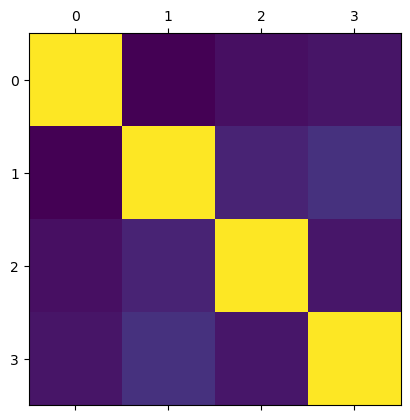

In [11]:
# Coorelation heatmap using matplotlib
plt.matshow(gv_sub.corr())
plt.show

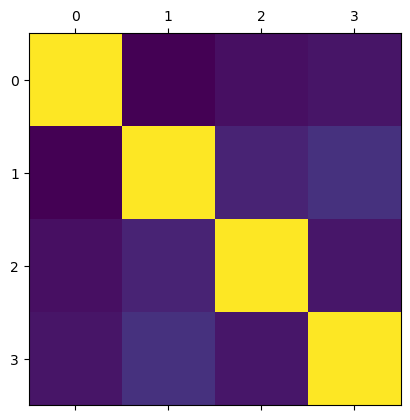

In [12]:
# Save figure
plt.matshow(gv_sub.corr())
plt.savefig("out.png")

In [13]:
# Check directory
cwd = os.getcwd()
cwd

'C:\\Users\\justi\\OneDrive\\Desktop\\Class work\\Achievement 6\\Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

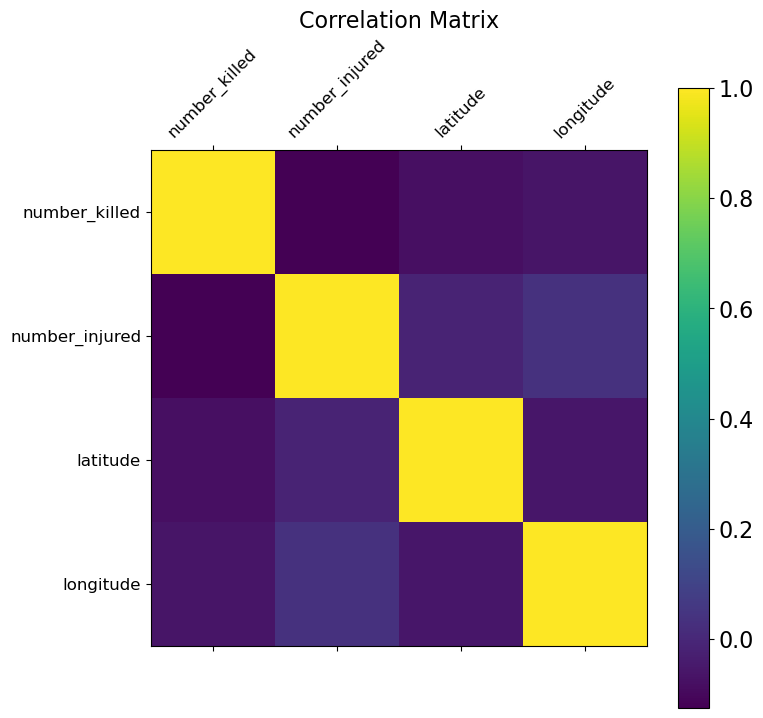

In [14]:
# Adding labels and legend to heatmap
f = plt.figure(figsize = (8, 8)) # Size
plt.matshow(gv_sub.corr(), fignum=f.number) # Plot type
plt.xticks(range(gv_sub.shape[1]), gv_sub.columns, fontsize = 12, rotation = 45) # x axis labels
plt.yticks(range(gv_sub.shape[1]), gv_sub.columns, fontsize = 12) # y axis labels
cb = plt.colorbar() # color legend
cb.ax.tick_params(labelsize=16) # font size
plt.title('Correlation Matrix', fontsize = 16) # Title

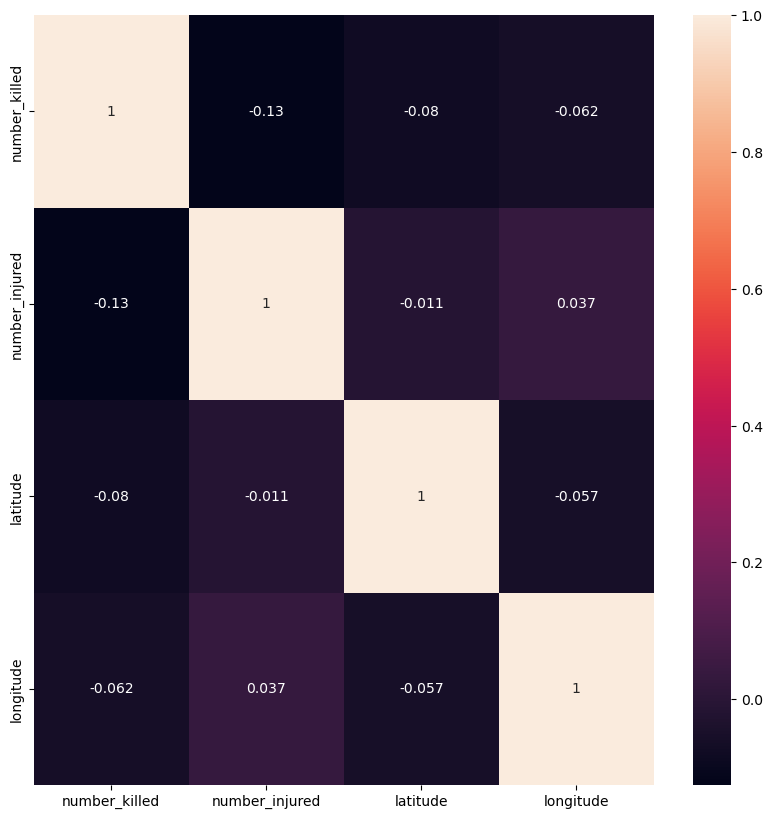

In [15]:
# Subplot with matplotlib
f,ax = plt.subplots(figsize =(10,10))
# Correlation heatmap with seaborn
corr = sns.heatmap(gv_sub.corr(), annot = True, ax = ax)

#
Question 3
There doesn't seem to be a strong relationship with any of these varibales

# 3. Scatter Plots

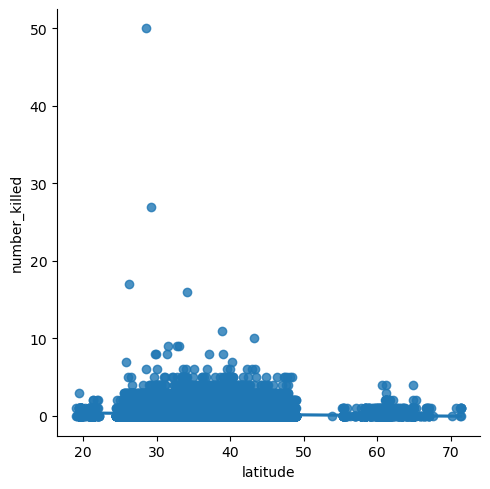

In [16]:
sns.lmplot( x = 'latitude', y = 'number_killed', data = gv_sub)

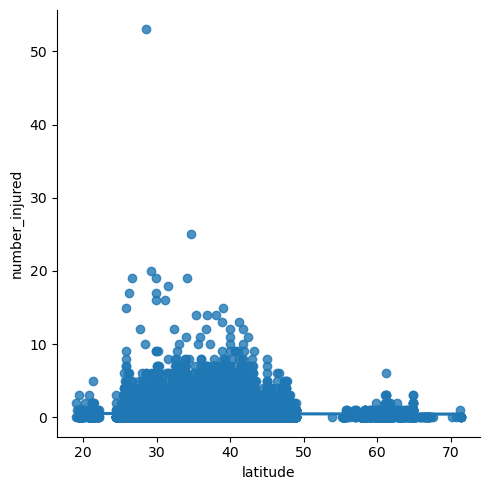

In [17]:
sns.lmplot( x= 'latitude', y = 'number_injured', data = gv_sub)

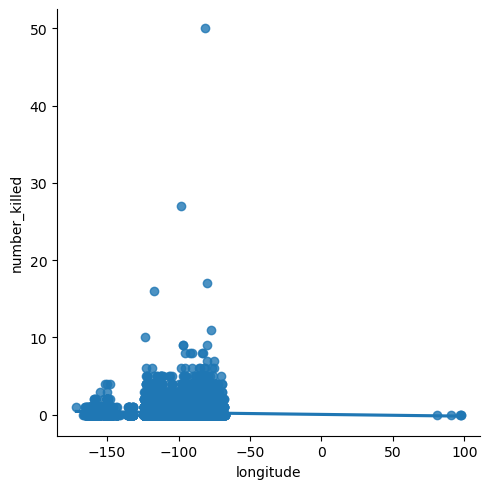

In [18]:
sns.lmplot( x= 'longitude', y = 'number_killed', data = gv_sub)

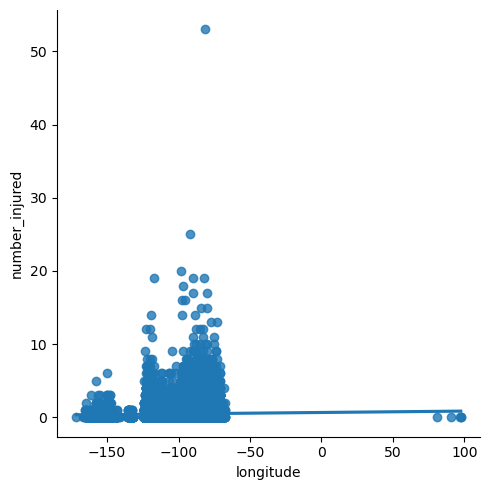

In [19]:
sns.lmplot( x= 'longitude', y = 'number_injured', data = gv_sub)

# 
Question 4 
The variables do not really follow the trend of correlation, many of the points are on the line but most are not. also we can see that there appears to be several outliers in the data


# Pair plots

In [20]:
# Subset for pair plots
gv_sub_2 = [['number_killed', 'number_injured', 'latitude', 'longitude']]

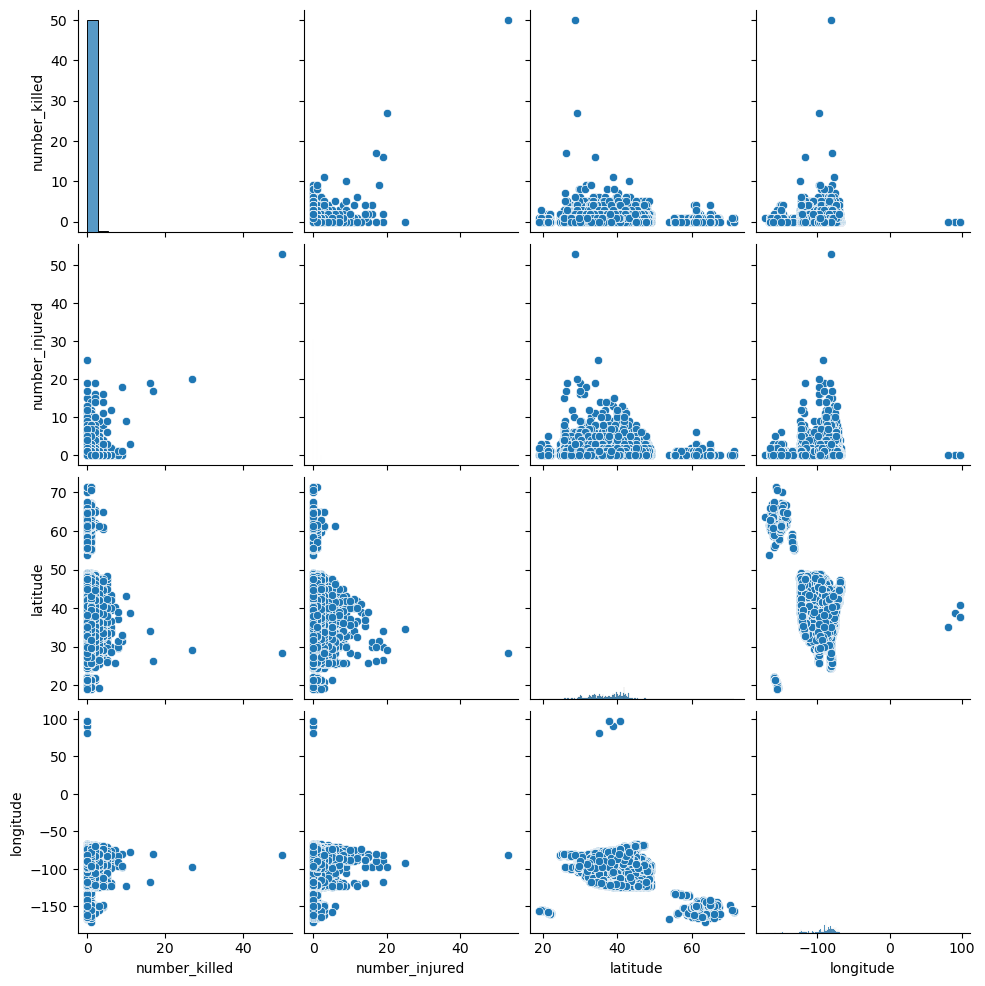

In [21]:
# Creating pait plots
gv_pair = sns.pairplot(gv_sub)

 # 
 Question 5
There doesn't seem to be a strong correaltion with any of the variables. However, i would like to further explore the numberkilled/injured with the latitude/longitude. 

# 4. Categorical Plots

<Axes: xlabel='number_killed', ylabel='Count'>

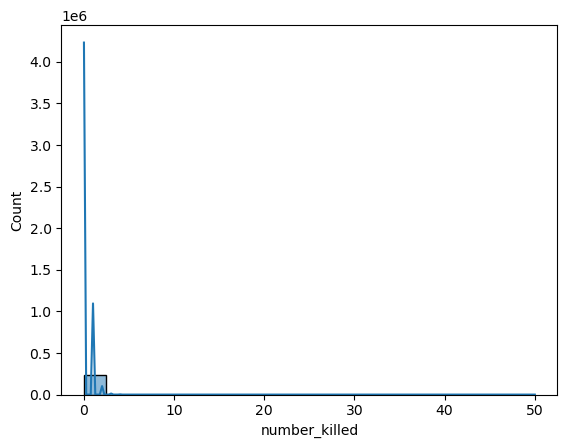

In [22]:
sns.histplot(gv['number_killed'], bins = 20, kde = True)

<Axes: xlabel='number_injured', ylabel='Count'>

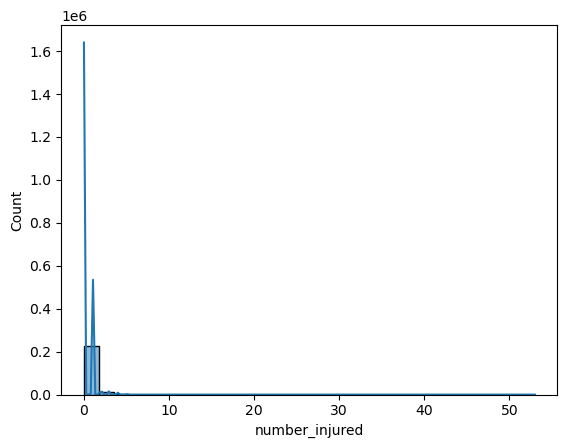

In [23]:
sns.histplot(gv['number_injured'], bins = 30, kde = True)

<Axes: xlabel='latitude', ylabel='Count'>

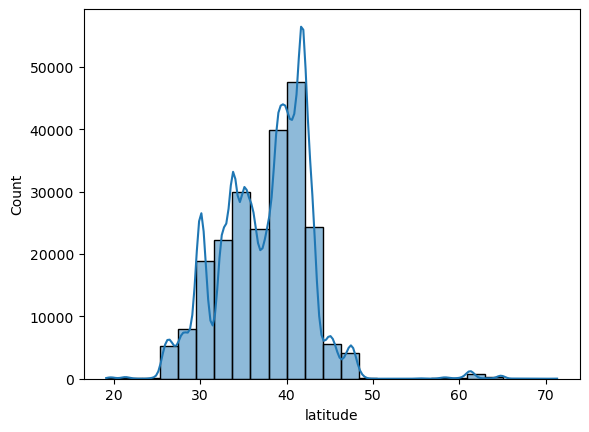

In [24]:
sns.histplot(gv['latitude'], bins = 25, kde = True)

<Axes: xlabel='longitude', ylabel='Count'>

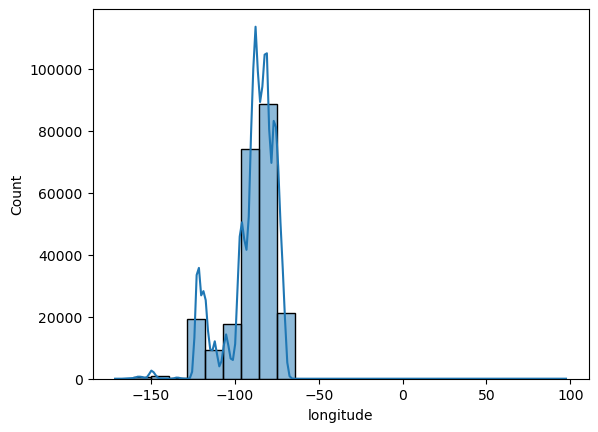

In [25]:
sns.histplot(gv['longitude'], bins = 25, kde = True)

In [26]:
gv.describe()

,Unnamed: 0,incident_id,number_killed,number_injured,latitude,longitude
count,239677.000000,2.396770e+05,239677.000000,239677.000000,231754.000000,231754.000000
mean,119838.000000,5.593343e+05,0.252290,0.494007,37.546598,-89.338348
std,69188.934572,2.931287e+05,0.521779,0.729952,5.130763,14.359546
min,0.000000,9.211400e+04,0.000000,0.000000,19.111400,-171.429000
25%,59919.000000,3.085450e+05,0.000000,0.000000,33.903400,-94.158725
50%,119838.000000,5.435870e+05,0.000000,0.000000,38.570600,-86.249600
75%,179757.000000,8.172280e+05,0.000000,1.000000,41.437375,-80.048625
max,239676.000000,1.083472e+06,50.000000,53.000000,71.336800,97.433100


#Categories for Victims killed

In [64]:
gv.loc[gv['number_killed'] == 0, 'Victims Killed'] = 'None'

In [65]:
gv.loc[(gv['number_killed'] >=1 ) & (gv['number_killed'] < 4), 'Victims Killed'] = "Few"

In [66]:
gv.loc[gv['number_killed'] >=4, 'Victims Killed'] = "Mass"

In [67]:
gv['Victims Killed'].value_counts(dropna = False)

None    185835
Few      53635
Mass       207
Name: Victims Killed, dtype: int64

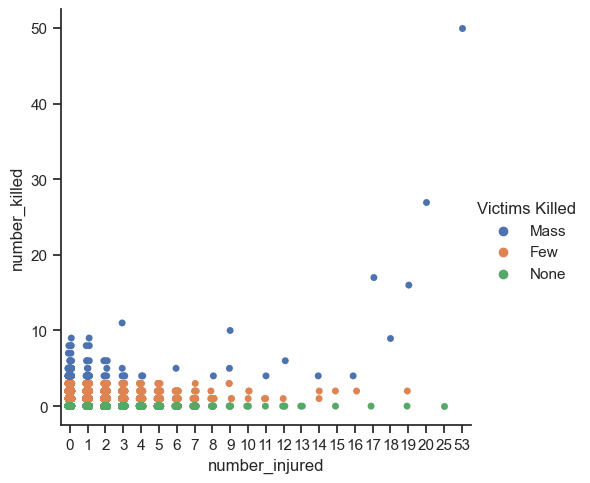

In [68]:
# Categorical Plot for victims killed
sns.set(style='ticks')
victim_injuries = sns.catplot(x="number_injured", y="number_killed", hue="Victims Killed", data=gv)


#Categories for vicitms injured

In [74]:
gv.loc[(gv['number_injured'] ==0 ) & (gv['number_injured'] < 2), 'Victims Injured'] = "Single"

In [75]:
gv.loc[(gv['number_injured'] >=2 ) & (gv['number_injured'] < 5), 'Victims Injured'] = "Few"

In [76]:
gv.loc[gv['number_injured'] >5, 'Victims Injured'] = "Many"

In [77]:
gv['Victims Injured'].value_counts(dropna = False)

Single    142487
Few        96743
Many         447
Name: Victims Injured, dtype: int64

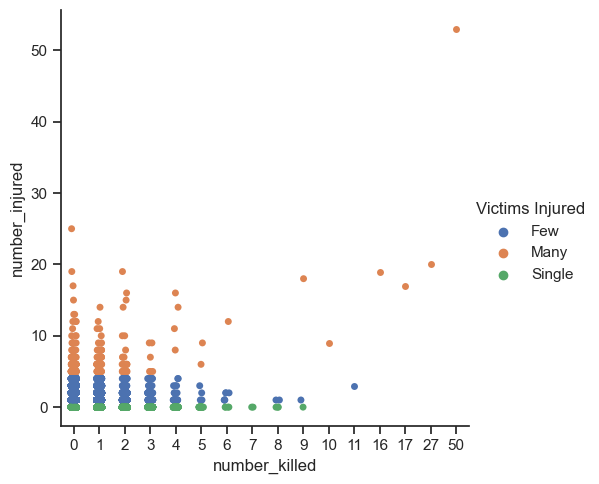

In [78]:
# Categorical plot for suspect injuries
sns.set(style='ticks')
suspect_injuries= sns.catplot(x="number_killed", y="number_injured", hue="Victims Injured", data=gv)

# 
Question 6
The categorical plots are showing that there more incidents where there are single victims injured and no victims killed than those of many victims injured and mass shootings.

#
Question 7 The question for are there more mass shootings than there are shootings with fewer victims was answered and it seems there are more incidents of shootings with fewer vicitms than 4, which is what the gun violence archive considers a mass shooting. 

#
Question 8 Hypothesis
1. There are more people injured by gun violence than killed. 
